# Test run pipeline
Starting from calints run entire pipeline and preview results plots

In [1]:
from erebus.utility.h5_serializable_file import H5Serializable
import erebus.utility.utils as utils 
from uncertainties import ufloat
from erebus.photometry_data import PhotometryData
from erebus.utility.run_cfg import ErebusRunConfig
from erebus.erebus import Erebus
import numpy as np
import matplotlib.pyplot as plt

In [2]:
lhs1478b = ErebusRunConfig.load("./lhs1478b_run.yaml")

In [3]:
erebus = Erebus(lhs1478b, force_clear_cache=True)

Loading data from calints in /mnt/c/Users/nicho/Research/GitHub/erebus/manual_tests/./mast_lhs1478b
Loading 5 segments


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:08<00:00,  1.72s/it]


Sorting data
Found star at: 127, 127
Rejecting NaNs and outliers


100%|████████████████████████████████████████████████████████████████████████████| 127/127 [00:01<00:00, 123.92it/s]


Interpolating bad pixels


100%|█████████████████████████████████████████████████████████████████████████████| 964/964 [03:25<00:00,  4.70it/s]


50 pixels were bad out of 16129
351 values were interpolated out of 15548356
1656 values were outliers out of 15548356
Loading data from calints in /mnt/c/Users/nicho/Research/GitHub/erebus/manual_tests/./mast_lhs1478b
Loading 5 segments


100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:08<00:00,  1.62s/it]


Sorting data
Found star at: 127, 128
Rejecting NaNs and outliers


100%|█████████████████████████████████████████████████████████████████████████████| 127/127 [00:01<00:00, 93.01it/s]


Interpolating bad pixels


100%|█████████████████████████████████████████████████████████████████████████████| 964/964 [03:23<00:00,  4.73it/s]


50 pixels were bad out of 16129
409 values were interpolated out of 15548356
1420 values were outliers out of 15548356
Circular orbit: using gaussian prior for t_sec
Predicted t_sec: 0.0879+/-0.0004 days from the start of the observation
Visit jw03730012001 wasn't run yet
Circular orbit: using gaussian prior for t_sec
Predicted t_sec: 0.0886+/-0.0004 days from the start of the observation
Visit jw03730013001 wasn't run yet
Circular orbit: using gaussian prior for t_sec_offset
Joint fit wasn't run yet


### Plotting initial guess

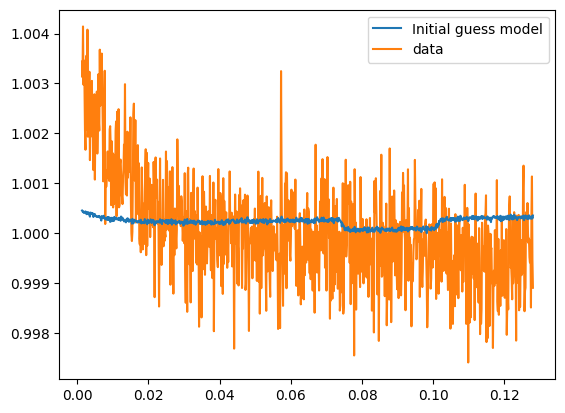

In [4]:
fit = erebus.individual_fits[0]
mcmc = fit.mcmc
initial_guess = np.array([mcmc.params[p].value for p in mcmc.params])[:-1]

t = fit.time
f = fit.raw_flux
f_model = fit.fit_method(t, *initial_guess)

plt.plot(t, f_model, label='Initial guess model', zorder=3)
plt.plot(t, f, label='data')
plt.legend()
plt.show()

In [ ]:
erebus.run(output_folder="./test_output/", force_clear_cache=True)

Initial guesses: [0.08793104333977175, 0.0002, 2458786.75425, 0.0462, 16.119, 1.9495378, 87.452, 0.1, 0.1, 0.1, 0.1, 0.1, 0.001, 1e-06, 0.0004] variation: [0.00021000250147319675, 0.000325, 0.00021, 0.00055, 0.047, 2.05e-06, 0.026, 2.475, 2.475, 2.475, 2.475, 2.475, 0.49975, 0.0024997500000000002, 0.0001]
Initial likelihood: 3124.8668630132834
Fitting for 15 parameters
Moved away from starting positions
Initial guesses shape: (2, 64, 15)
Mean likelihood after moving: 5214.9252412977785
process chain 0


100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [02:17<00:00, 72.93it/s]


process chain 1


100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [02:24<00:00, 69.04it/s]


The chain is shorter than 50 times the integrated autocorrelation time for 1 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 200;
tau: [165.77218073 173.42006062 173.2774185  170.23952531 179.91807831
 165.96308014 182.07273958 177.20676859 176.49858465 191.92140595
 183.02113762 201.73066917 193.70416065 194.11663353 160.76275882]
Rubin gelman convergence: [1.00067197 1.00010782 1.00002813 1.00003706 1.00079666 1.00048509
 0.99999918 1.00040623 1.00000513 1.00000033 1.00007836 1.00000168
 1.00018553 1.00015433 1.00028808] converged? True
Autocorr time: inf converged? False
Iterations: 10000 Max steps: 100000
Continue looping? True
process chain 0


100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [02:14<00:00, 74.37it/s]


process chain 1


100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [02:10<00:00, 76.47it/s]


Rubin gelman convergence: [1.00045786 1.00025991 1.00074704 1.00000108 1.00008888 1.00002136
 1.00001153 1.00043538 1.00006321 1.00016773 1.00028445 1.00005572
 1.00130718 1.00129237 1.00069009] converged? True
Autocorr time: 193.6652371422465 converged? True
Iterations: 20000 Max steps: 100000
Continue looping? False
Autocorr time: 193.6652371422465
{'t_sec': 0.0880050389986147+/-0.00039827704042329215, 'fp': -0.0001435980348603183+/-7.226838270148851e-05, 't0': 2458786.754259906+/-0.0004165137652307749, 'rp_rstar': 0.04620587875773663+/-0.0010833368595588797, 'a_rstar': 16.119212405136253+/-0.09258472158333042, 'p': 1.949537872376511+/-4.090788515598298e-06, 'inc': 87.45291253936425+/-0.05043475542155562, 'ecc': 0.0+/-0, 'w': 0.0+/-0, 'pc1': 1.1591410555176536+/-0.12374422327773027, 'pc2': 1.0976027828459853+/-0.09590153882051622, 'pc3': 0.03752023236571422+/-0.20642542749574283, 'pc4': 0.1318201453572872+/-0.1871117285342655, 'pc5': -0.1576061591851946+/-0.22386031765909845, 'exp1':

 51%|█████████████████████████████████████▊                                    | 5105/10000 [01:19<01:15, 64.52it/s]

In [ ]:
fit = erebus.individual_fits[0]
print(fit.order)

res = fit.results
res_nominal_values = [res[k].nominal_value for k in res][:-1]
physical_params = res_nominal_values[:9]
systematic_params = res_nominal_values[9:]

t = fit.time
f = fit.raw_flux
f_model = fit.fit_method(t, *res_nominal_values)
plt.plot(t, f_model, label='model', zorder=3)
plt.plot(t, f, linestyle='', marker='.', label='data')
plt.legend()
plt.show()

f_systematic = fit.systematic_model(t, *systematic_params)
plt.plot(t, f_model / f_systematic, label='model', zorder=3)
plt.plot(t, f / f_systematic, linestyle='', marker='.', label='data')
plt.legend()
plt.show()

print(res['fp']*1e6)